In [2]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
from scipy import stats
from sklearn.metrics import mean_squared_error

In [3]:
#Setting Working directory
os.chdir("D:\\edwisor\\Employee_Absentism")  
#loading data
data=pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
#first 5 rows of data
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
#shape of the data
data.shape

(740, 21)

In [6]:
#information about the variables of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [7]:
#'con' and 'cat' are continuous and categorical variables respectively
con= ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

cat= ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [8]:
#description of the data
desc=data.describe()
desc

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Box plots

In [9]:
#plotting box plots for continuous variables

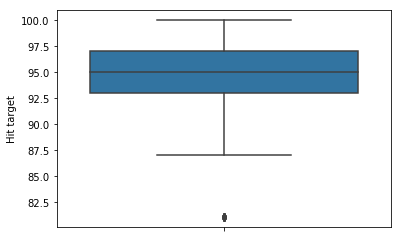

In [10]:
sns.boxplot(y=data['Hit target'])

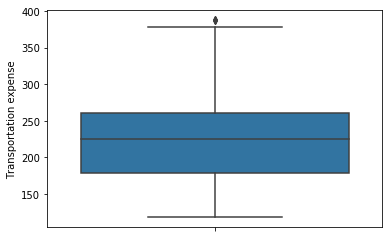

In [11]:
sns.boxplot(y=data['Transportation expense'])

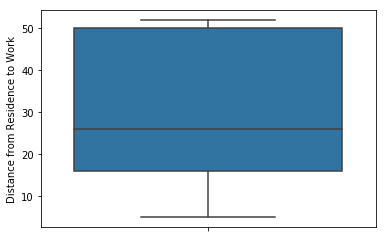

In [12]:
sns.boxplot(y=data['Distance from Residence to Work'])

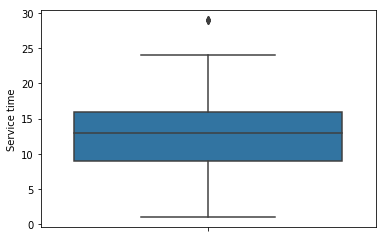

In [13]:
sns.boxplot(y=data['Service time'])

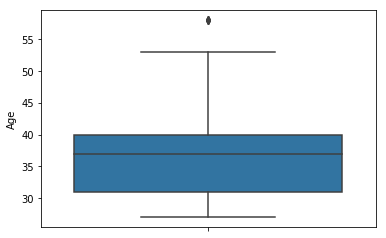

In [14]:
sns.boxplot(y=data['Age'])

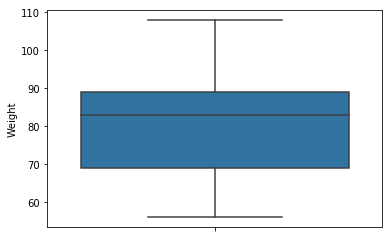

In [15]:
sns.boxplot(y=data['Weight'])

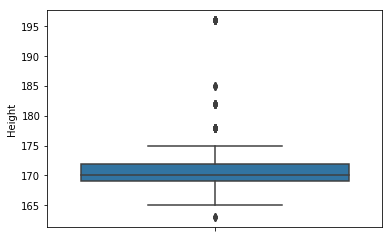

In [16]:
sns.boxplot(y=data['Height'])

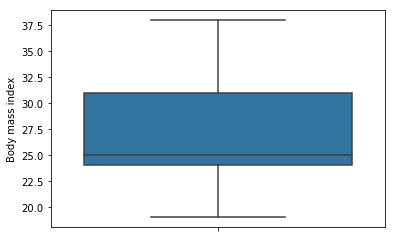

In [17]:
sns.boxplot(y=data['Body mass index'])

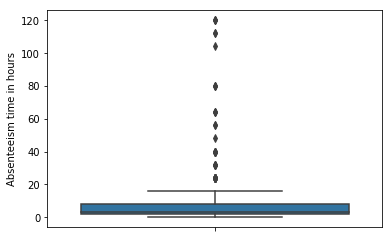

In [18]:
sns.boxplot(y=data['Absenteeism time in hours'])

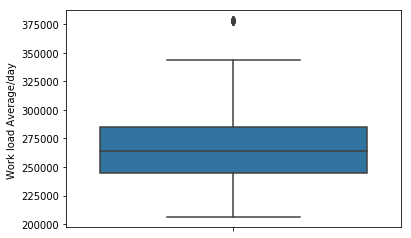

In [19]:
sns.boxplot(y=data['Work load Average/day '])

# Missing value analysis

In [20]:
#making a dataframe for null values
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.index.name='Variables'
nulls.columns= ['no of nulls']
nulls['percentage']= (nulls['no of nulls']/data.shape[0])*100
nulls

,no of nulls,percentage
Variables,,
Body mass index,31,4.189189
Absenteeism time in hours,22,2.972973
Height,14,1.891892
Education,10,1.351351
Work load Average/day,10,1.351351
Transportation expense,7,0.945946
Disciplinary failure,6,0.810811
Hit target,6,0.810811
Son,6,0.810811


In [21]:
nulls.reset_index(inplace=True)

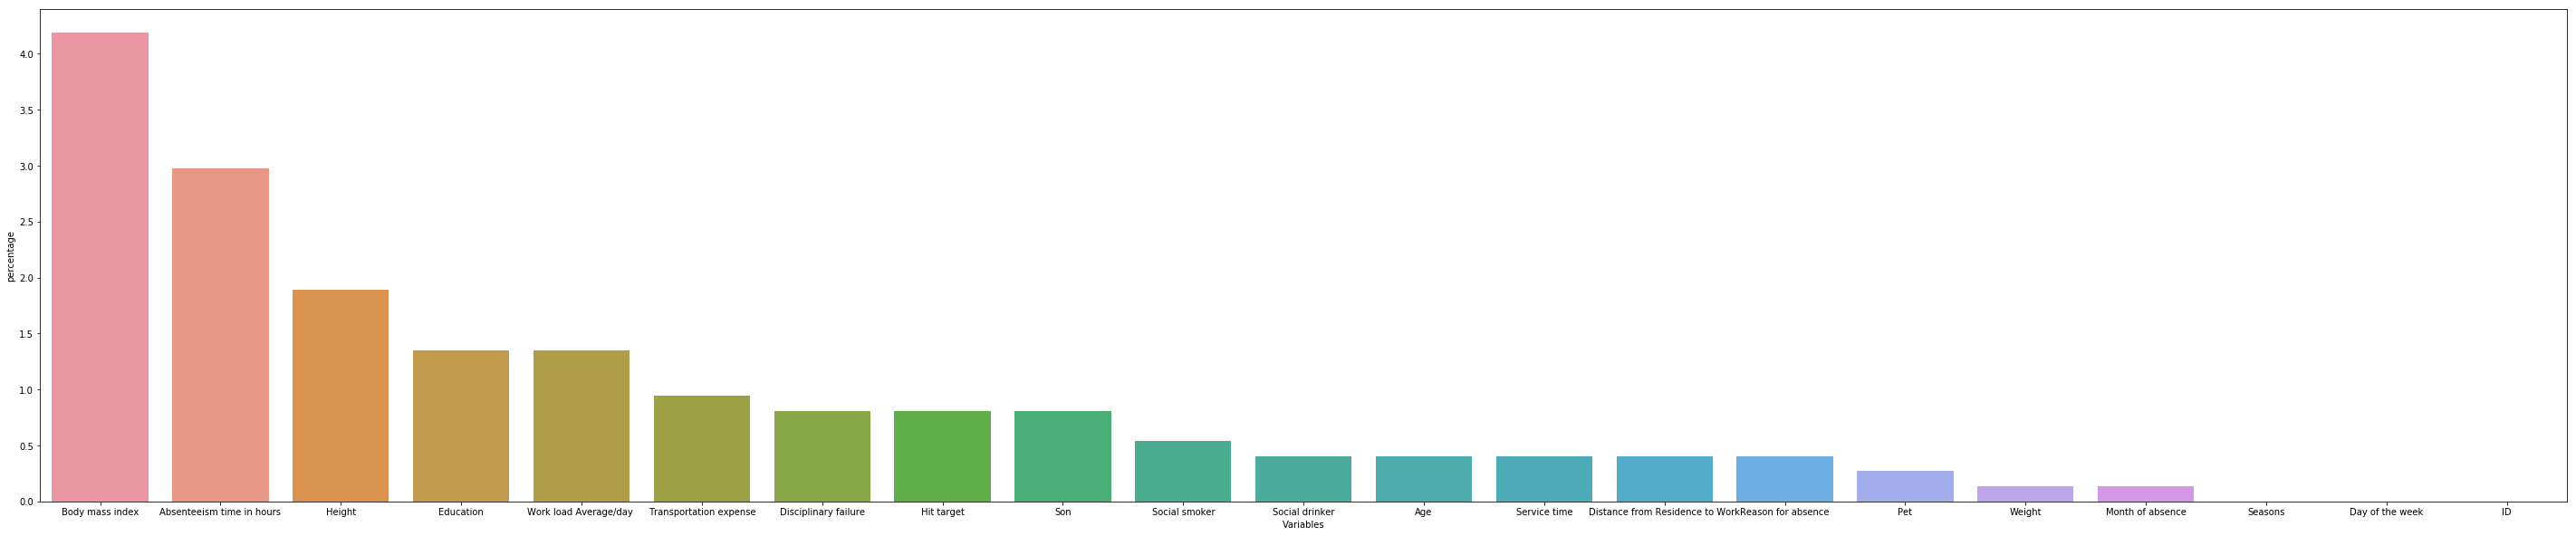

In [22]:
#plotting the nulls
plt.subplots(figsize=(50,10))
sns.barplot(x=nulls['Variables'],y=nulls['percentage'])

In [23]:
#all the columns of data
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [24]:
#unique values of 'Absenteeism time in hours'
data['Absenteeism time in hours'].unique()

array([  4.,   0.,   2.,  nan,   8.,  40.,   1.,   7.,   3.,  32.,   5.,
        16.,  24.,  64.,  56.,  80., 120., 112., 104.,  48.])

In [25]:
#we have to remove the rows in which our target variable has null values
data=data.drop(data[data['Absenteeism time in hours'].isnull()].index)

In [26]:
#no of rows decreased from 740 to 718
data.shape

(718, 21)

In [27]:
data['Body mass index'].std()

4.290805803841745

In [28]:
#imputing missing values with different methods
#checking for body mass index since it contain most number of missing values
data['Body mass index'][60]

31.0

In [29]:
#train['Body mass index'][60]
#train['Body mass index'].std()
#original value = 31
#mean = 26.70     #change in std=0.0907
#median = 25       #change in std=0.0769
#KNN = 28          #change in std=0.0189

In [30]:
data['Body mass index'][60]= np.nan

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#imputation by mean
#train['Body mass index']=train['Body mass index'].fillna(train['Body mass index'].mean())

#imputation by median
#train['Body mass index']=train['Body mass index'].fillna(train['Body mass index'].median())

#Apply KNN imputation algorithm
data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.218
Imputing row 101/718 with 1 missing, elapsed time: 0.220
Imputing row 201/718 with 0 missing, elapsed time: 0.222
Imputing row 301/718 with 0 missing, elapsed time: 0.223
Imputing row 401/718 with 0 missing, elapsed time: 0.224
Imputing row 501/718 with 1 missing, elapsed time: 0.225
Imputing row 601/718 with 0 missing, elapsed time: 0.226
Imputing row 701/718 with 0 missing, elapsed time: 0.227


In [32]:
#checking if any more null
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Outlier analysis

In [33]:
#fixing the outliers in the continuous data
#Distance from Residence to work, Body mass index and Weight does not have any outliers(can see from box plots)

In [34]:
c= ['Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Height', 'Absenteeism time in hours']

# Count of No of outliers in each variable
for i in c:
    print(i)
    count=0
    q75, q25= np.percentile(data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,data.shape[0]):
        if(data[i][j]>maxm or data[i][j]<minm):
            count=count+1
    print(count)

Service time
5
Age
8
Work load Average/day 
29
Transportation expense
3
Hit target
19
Height
114
Absenteeism time in hours
43


In [35]:
#fixing the outliers
for i in c:
    q75, q25= np.percentile(data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,data.shape[0]):
        if(data[i][j]>maxm or data[i][j]<minm):
            data[i][j]= np.nan   #substituting the outliers with null
    
    
#imputing null using knn
data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)
    

Imputing row 1/718 with 0 missing, elapsed time: 0.178
Imputing row 101/718 with 0 missing, elapsed time: 0.180
Imputing row 201/718 with 1 missing, elapsed time: 0.181
Imputing row 301/718 with 0 missing, elapsed time: 0.184
Imputing row 401/718 with 0 missing, elapsed time: 0.186
Imputing row 501/718 with 0 missing, elapsed time: 0.187
Imputing row 601/718 with 2 missing, elapsed time: 0.188
Imputing row 701/718 with 0 missing, elapsed time: 0.190


In [36]:
#We can see no outliers after imputing with knn
for i in c:
    print(i)
    count=0
    q75, q25= np.percentile(data[i],[75,25])
    iqr = q75 - q25
    maxm = q75 + (iqr*1.5)
    minm = q25 - (iqr*1.5)
    for j in range(0,data.shape[0]):
        if(data[i][j]>maxm or data[i][j]<minm):
            count=count+1
    print(count)

Service time
0
Age
0
Work load Average/day 
0
Transportation expense
0
Hit target
0
Height
0
Absenteeism time in hours
0


In [37]:
train = data.copy()
#data= train.copy()

# Feature Selection

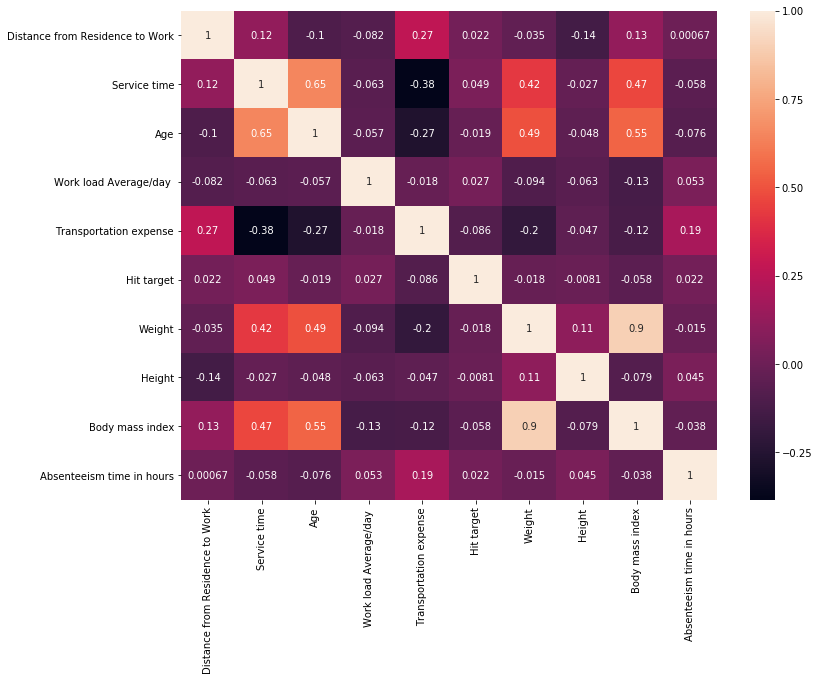

In [38]:
#correlation test for continuous variables
num = data.loc[:,con]
corr=num.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,annot = True)

In [39]:
#Weight and body mass index are highly correlated

In [40]:
#Anova test for categorical variables
for i in cat:
    f, p = stats.f_oneway(data[i], data["Absenteeism time in hours"])
    print("P value of "+str(i)+" is "+ str(p))

P value of ID is 8.449881295013552e-167
P value of Reason for absence is 9.770767089088417e-277
P value of Month of absence is 3.3124782278857673e-25
P value of Day of the week is 0.0008188161594849071
P value of Seasons is 3.127506937786291e-40
P value of Disciplinary failure is 1.2189432024253421e-185
P value of Education is 8.375003325123203e-105
P value of Social drinker is 1.2794395762714786e-150
P value of Social smoker is 9.117849965003895e-184
P value of Pet is 5.325984030592952e-127
P value of Son is 9.45269711512623e-116


In [41]:
data= data.drop(['Weight'],axis=1)

In [42]:
data.shape

(718, 20)

# Univariate Analysis

In [43]:
#Reason for absence
data['Reason for absence'].unique()

array([26.        ,  0.        , 23.        ,  7.        , 22.        ,
       19.        ,  1.        , 11.        , 21.        , 13.        ,
       28.        , 18.        , 25.        , 24.        , 14.        ,
       10.        ,  6.        , 27.        , 17.        ,  8.        ,
       12.        ,  5.        ,  9.        , 15.        ,  4.        ,
        3.        , 27.98445796, 27.37765627, 20.07173403,  2.        ,
       16.        ])

In [44]:
data['Reason for absence']=data['Reason for absence'].astype('int64')
data['Reason for absence']=data['Reason for absence'].replace(0,20)

In [45]:
data['Reason for absence'].unique()

array([26, 20, 23,  7, 22, 19,  1, 11, 21, 13, 28, 18, 25, 24, 14, 10,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

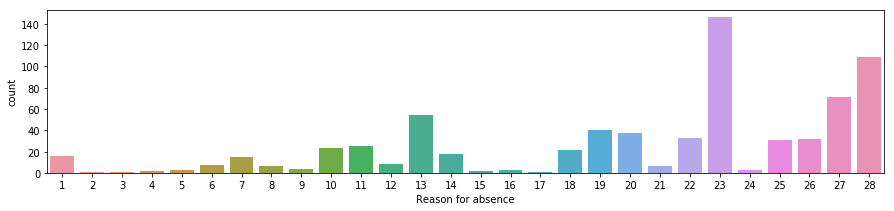

In [46]:
plt.subplots(figsize=(15,3))
sns.countplot(x=data['Reason for absence'])

In [47]:
#ID
data['ID'].value_counts()

3.0     111
28.0     75
34.0     54
22.0     46
11.0     40
20.0     39
15.0     37
36.0     32
14.0     28
24.0     28
33.0     24
10.0     22
1.0      22
17.0     20
5.0      18
18.0     15
13.0     14
25.0     10
9.0       8
6.0       8
12.0      7
23.0      6
7.0       6
27.0      6
2.0       6
30.0      6
29.0      5
32.0      5
26.0      5
19.0      3
31.0      3
21.0      3
8.0       2
16.0      2
4.0       1
35.0      1
Name: ID, dtype: int64

In [48]:
#day of week
data['Day of the week'].unique()

array([3., 4., 5., 6., 2.])

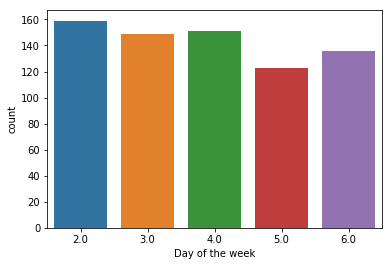

In [49]:
sns.countplot(data['Day of the week'])

In [50]:
#Seasons
data['Seasons'].unique()

array([1., 4., 2., 3.])

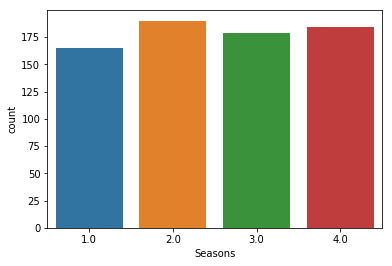

In [51]:
sns.countplot(data['Seasons'])

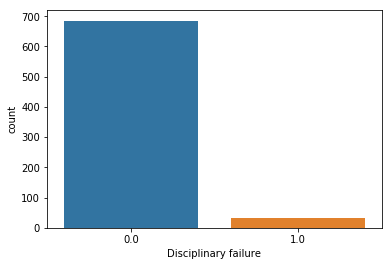

In [52]:
#Disciplinary failure
sns.countplot(data['Disciplinary failure'])

In [53]:
#Education
data['Education'].unique()

array([1.        , 3.        , 1.00000006, 2.        , 1.        ,
       0.99999996, 0.99999999, 4.        ])

In [54]:
for i in range(0,data.shape[0]):
    if(data['Education'][i]>0.6 and data['Education'][i]<1.0):
        data['Education'][i]=1.0

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
data['Education']=data['Education'].astype('int64')
data['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

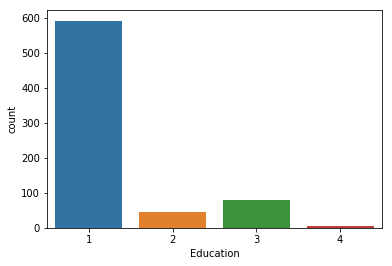

In [56]:
sns.countplot(data['Education'])

In [57]:
#Social drinker
data['Social drinker'].unique()

array([1.        , 0.        , 0.9318243 , 0.71745559])

In [58]:
for i in range(0,data.shape[0]):
    if(data['Social drinker'][i]>0.6 and data['Social drinker'][i]<1.0):
        data['Social drinker'][i]=1.0

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


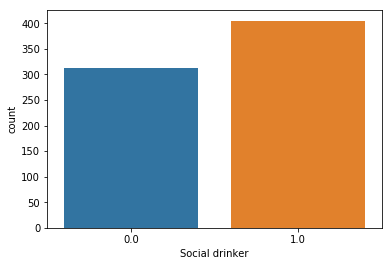

In [59]:
sns.countplot(data['Social drinker'])

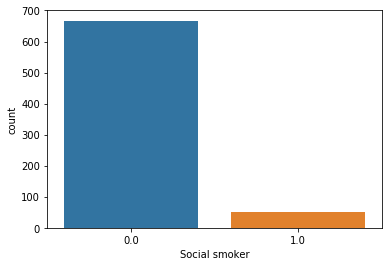

In [60]:
#Social smoker
sns.countplot(data['Social smoker'])

In [61]:
#PET
data['Pet'].unique()

array([1.        , 0.        , 4.        , 2.        , 5.        ,
       1.00000001, 8.        ])

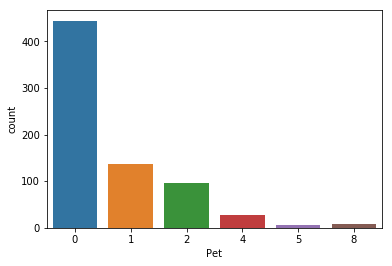

In [62]:
data['Pet']=data['Pet'].astype('int64')
sns.countplot(data['Pet'])

In [63]:
#Son
data['Son'].unique()

array([2.        , 1.        , 0.        , 4.        , 3.        ,
       3.95755356, 2.00000009, 1.        ])

In [64]:
for i in range(0,data.shape[0]):
    if(data['Social drinker'][i]>3.6 and data['Social drinker'][i]<4.0):
        data['Social drinker'][i]=4.0

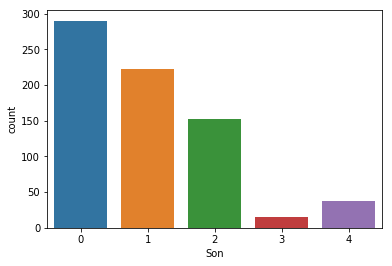

In [65]:
data['Son']=data['Son'].astype('int64')
sns.countplot(data['Son'])

In [66]:
#Analysing the continuous variables now
#updating continuous variables
con= ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target','Height', 'Body mass index', 'Absenteeism time in hours']

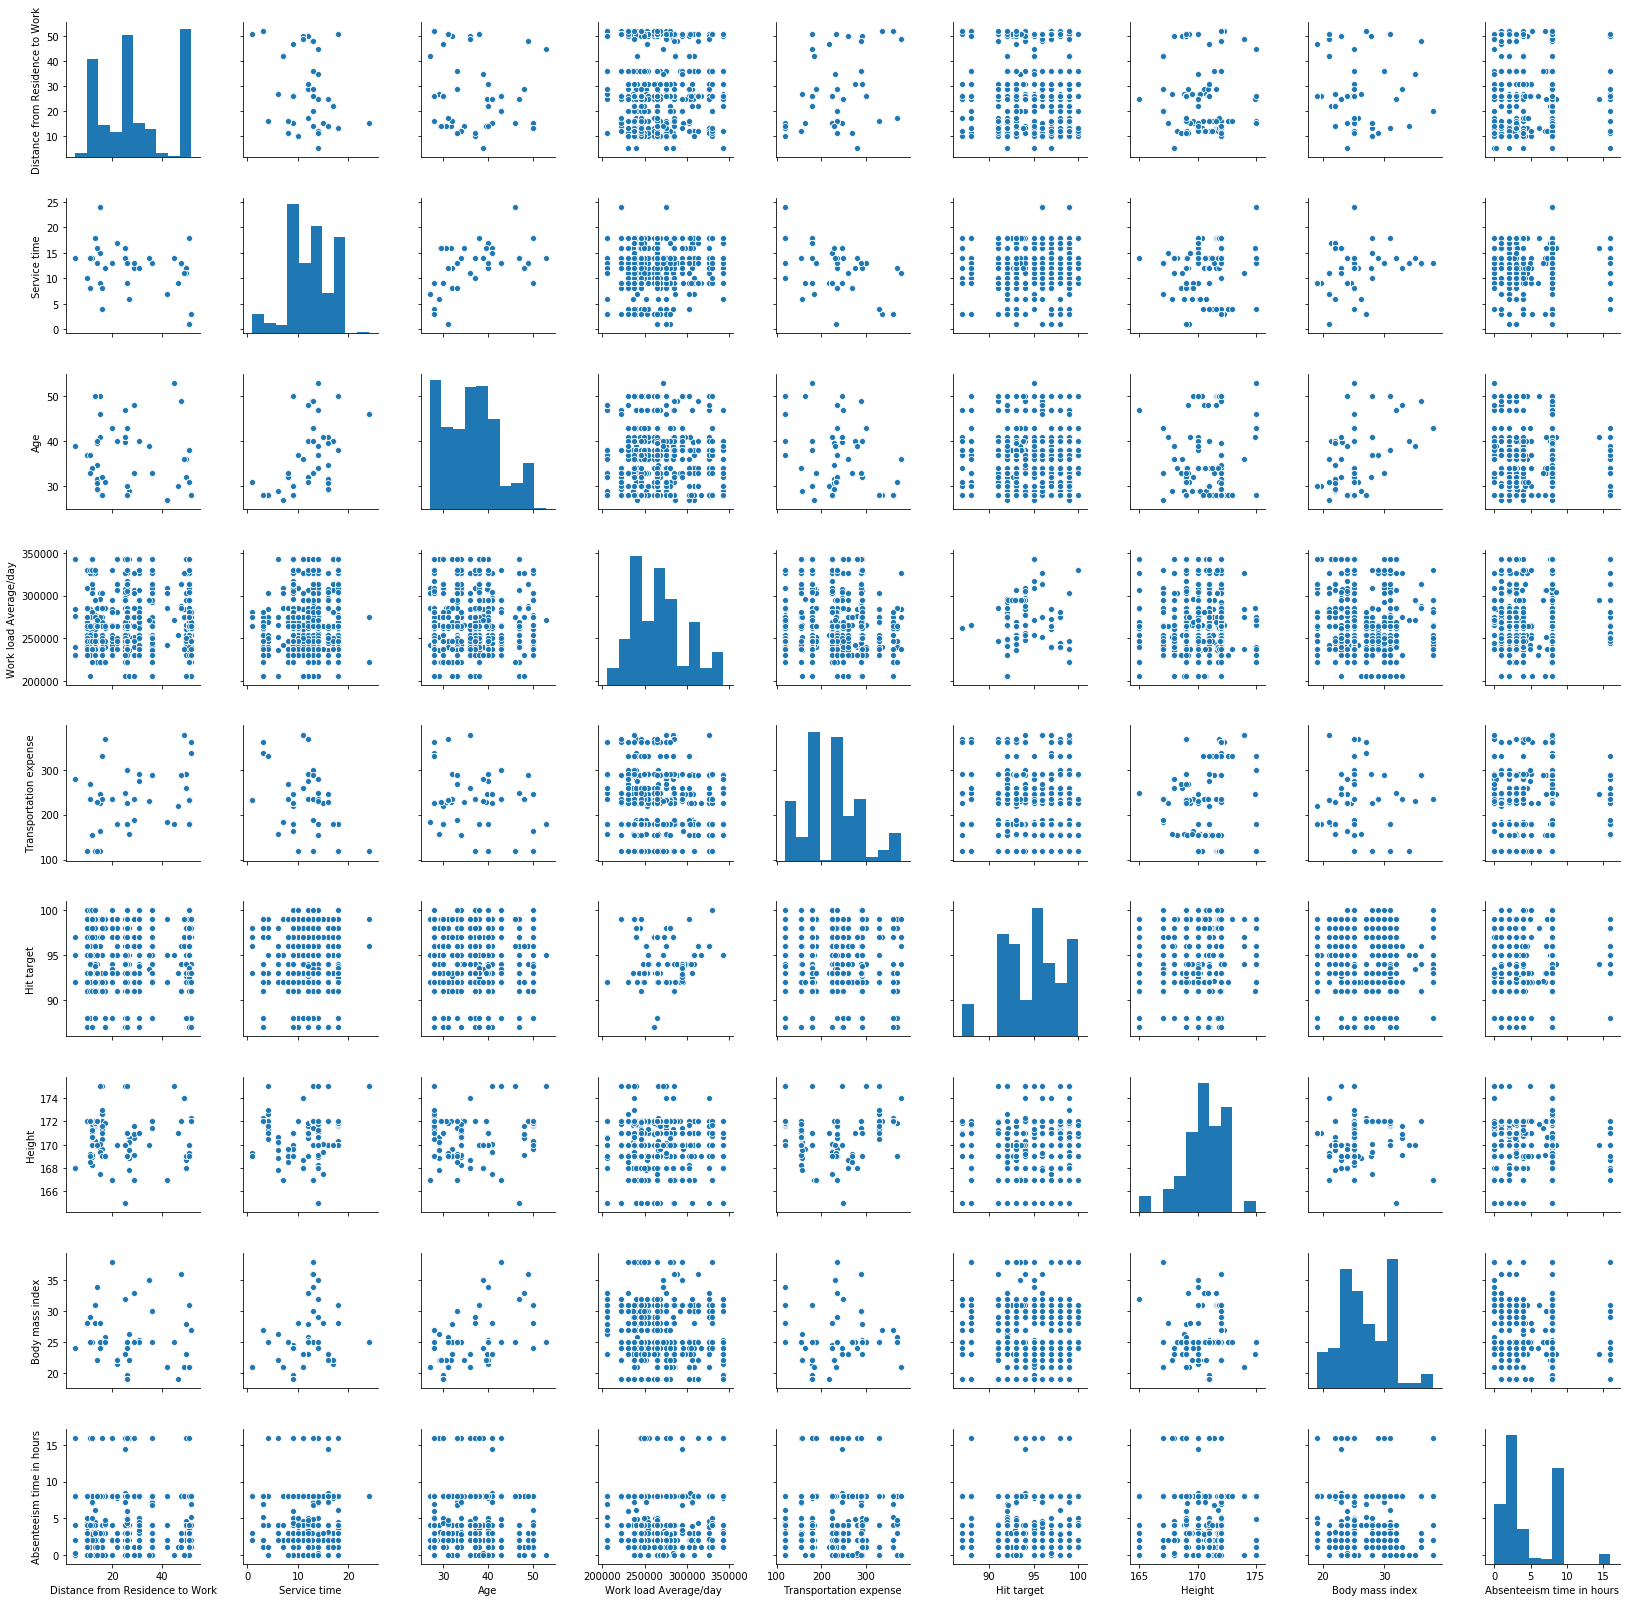

In [67]:
sns.pairplot(data=data,vars=con)

In [68]:
df = data.copy()
#data = df.copy()

# Bivariate Analysis

In [69]:
cat= ['ID','Reason for absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

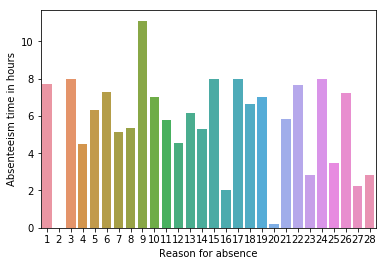

In [70]:
#Reason for absence and absenteeism time in hours
sns.barplot(data['Reason for absence'],data['Absenteeism time in hours'],ci=None)

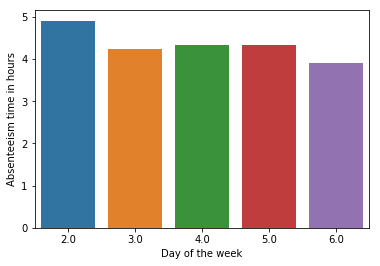

In [71]:
#day of week and absenteeism time in hours
sns.barplot(data['Day of the week'],data['Absenteeism time in hours'],ci=None)

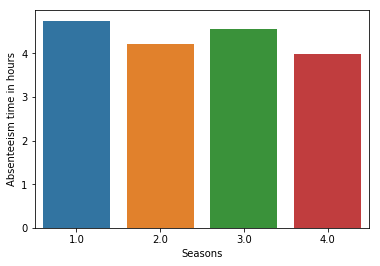

In [72]:
#season and absenteeism time in hours
sns.barplot(data['Seasons'],data['Absenteeism time in hours'],ci=None)

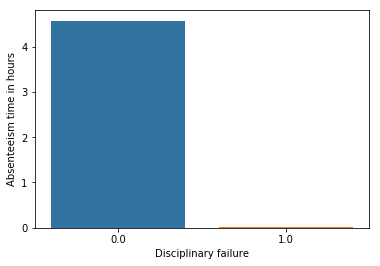

In [73]:
#'Disciplinary failure' and absenteeism time in hours
sns.barplot(data['Disciplinary failure'],data['Absenteeism time in hours'],ci=None)

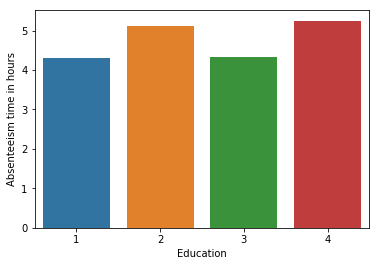

In [74]:
#'Education' and absenteeism time in hours
sns.barplot(data['Education'],data['Absenteeism time in hours'],ci=None)

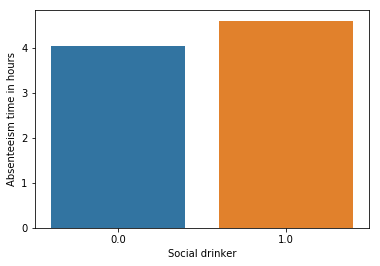

In [75]:
#'Social drinker' and absenteeism time in hours
sns.barplot(data['Social drinker'],data['Absenteeism time in hours'],ci=None)

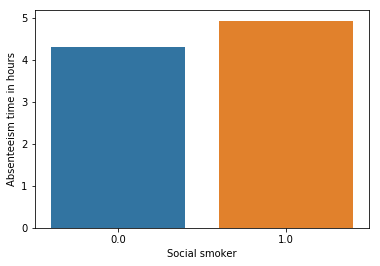

In [76]:
#'Social smoker' and absenteeism time in hours
sns.barplot(data['Social smoker'],data['Absenteeism time in hours'],ci=None)

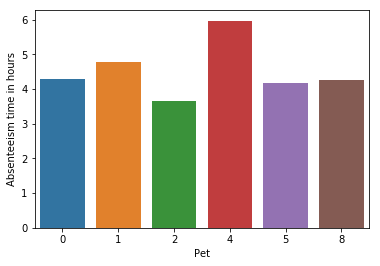

In [77]:
#Pet and absenteeism time in hours
sns.barplot(data['Pet'],data['Absenteeism time in hours'],ci=None)

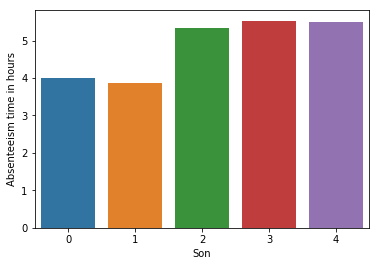

In [78]:
#son and absenteeism time in hours
sns.barplot(data['Son'],data['Absenteeism time in hours'],ci=None)

In [79]:
#ID and Absenteeism in hours
z= data[['ID','Absenteeism time in hours']].groupby('ID').sum().sort_values(by='Absenteeism time in hours',ascending=False)
z

,Absenteeism time in hours
ID,
3.0,386.588147
11.0,279.806404
28.0,238.975675
20.0,211.736287
34.0,198.413974
22.0,174.290852
24.0,172.041744
10.0,135.166941
14.0,133.152215


# Feature Scaling

In [80]:
#since the distribution of continuous variables is not normal so we would go for normalisation for scaling
con= ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target','Height', 'Body mass index']

In [81]:
for i in con:
    data[i]= (data[i]-data[i].min())/(data[i].max() - data[i].min())

In [82]:
df=data.copy()

# Modeling

In [83]:
cat= ['ID','Reason for absence','Day of the week','Month of absence',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [84]:
#dummy variables for categorical data
data = pd.get_dummies(data=data, columns=cat)

In [85]:
data.shape

(718, 117)

In [86]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Son_0,Son_1,Son_2,Son_3,Son_4
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,4.0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.500001,0.631579,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.500000,0.631579,2.0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.300000,0.263158,4.0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.700000,0.578947,2.0,0,...,1,0,0,0,0,0,0,1,0,0


In [87]:
y=data['Absenteeism time in hours']
X=data.drop(['Absenteeism time in hours'],axis=1)

In [88]:
df=X.copy()

In [89]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = rf.predict(X_test)
rmse =np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= rf, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


e:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Root Mean Squared Error For Test data = 2.935825104615713
R^2 Score = 0.14488200590482736
mean of accuracies of 10 folds = 0.38393177147838187
standard deviation of accuracies of 10 folds = 0.06985024889111616


# XGBoost

In [91]:
from xgboost import XGBRegressor

xg = XGBRegressor(max_depth=4)
xg.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = xg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= xg, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 2.857616738210419
R^2 Score = 0.1898346820853659
mean of accuracies of 10 folds = 0.37801535252313334
standard deviation of accuracies of 10 folds = 0.09390507476193483


# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= lr, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 2077050716373.5674
R^2 Score = -4.280158853369276e+23
mean of accuracies of 10 folds = -3.232970129056197e+24
standard deviation of accuracies of 10 folds = 6.964258958303424e+24


# Dimensioality Reduction

# PCA

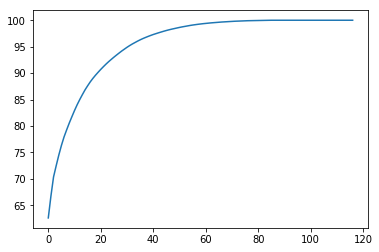

In [93]:
from sklearn.decomposition import PCA

# Converting data to numpy array
X = data.values

pca = PCA(n_components=117)
pca.fit(X)

# The amount of variance that each PC explains
var= np.cumsum(pca.explained_variance_ratio_*100)
plt.plot(var)
plt.show()

In [94]:
# Hence selecting about 45 component will be enough
pca = PCA(n_components=45)

# Fitting the selected components to the data
X= pca.fit_transform(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = rf.predict(X_test)
rmse =np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= rf, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 0.07755993017120952
R^2 Score = 0.9996068818450513
mean of accuracies of 10 folds = 0.9994751985743535
standard deviation of accuracies of 10 folds = 0.0008014700254722678


In [96]:
from xgboost import XGBRegressor

xg = XGBRegressor(max_depth=4)
xg.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = xg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= xg, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 0.036067740523603
R^2 Score = 0.9999149868408238
mean of accuracies of 10 folds = 0.9996291663742873
standard deviation of accuracies of 10 folds = 0.0008221878975279632


In [97]:

lr=LinearRegression()
lr.fit(X_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#k-fold cross validation test
accuracies = cross_val_score(estimator= lr, X=X_train , y=y_train , cv=10)
mean= accuracies.mean()
std= accuracies.std()

print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r2_score(y_test,y_pred)))
print("mean of accuracies of 10 folds = "+str(mean))
print("standard deviation of accuracies of 10 folds = "+str(std))


Root Mean Squared Error For Test data = 0.002872644209029529
R^2 Score = 0.9999994607229211
mean of accuracies of 10 folds = 0.9999990763654661
standard deviation of accuracies of 10 folds = 3.9192916184003764e-07
